In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import nfl_data_py as nfl

In [2]:
# Turn off max columns for pandas DataFrame
pd.set_option('display.max_columns', None)

In [3]:
years = range(1999, 2023)

In [4]:
data = nfl.import_pbp_data(years, cache=True, alt_path="../cache")

1999 done.
2000 done.
2001 done.
2002 done.
2003 done.
2004 done.
2005 done.
2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


In [85]:
df = data[['season', 'receiver', 'yards_gained', 'play_type', 'season_type', 'receiver_id']]

In [86]:
# Filter out postseason games and plays that are not receptions
df = df[(df['season_type'] == 'REG') & (df['play_type'] == 'pass')]

In [87]:
# Group by season and receiver
df = df.groupby(['season', 'receiver', 'receiver_id'])\
    .sum()\
        .reset_index()

In [88]:
# Add a column for next season yards gained
df['next_season_yards'] = df.groupby('receiver')['yards_gained'].shift(-1)

In [89]:
# Filter to only include 1000 yard seasons
df = df[df['yards_gained'] >= 1000]


In [90]:
# Keep only the first 1000 yard season for each receiver
df = df.drop_duplicates(subset=['receiver'], keep='first')

In [91]:
# Pull the 2022 season out of the DataFrame
df_2022 = df[df['season'] == 2022]

In [92]:
# Drop rows with null values
df = df.dropna()

In [93]:
df

,season,receiver,receiver_id,yards_gained,next_season_yards
0,1999,A.Connell,00-0003378,1121.0,756.0
4,1999,A.Freeman,00-0005562,1074.0,894.0
23,1999,A.Toomer,00-0016550,1183.0,1078.0
49,1999,B.Schroeder,00-0014489,1051.0,999.0
58,1999,C.Carter,00-0002721,1192.0,1253.0
...,...,...,...,...,...
10620,2021,K.Pitts,00-0036970,1026.0,356.0
10645,2021,M.Andrews,00-0034753,1365.0,849.0
10650,2021,M.Brown,00-0035662,1008.0,37.0
10670,2021,M.Pittman,00-0036252,1084.0,925.0


In [97]:
df = df.rename(columns={'yards_gained': 'First 1000+ Yard Season', 'next_season_yards': 'Next Season'})
df_2022 = df_2022.rename(columns={'yards_gained': 'First 1000+ Yard Season', 'next_season_yards': 'Next Season'})

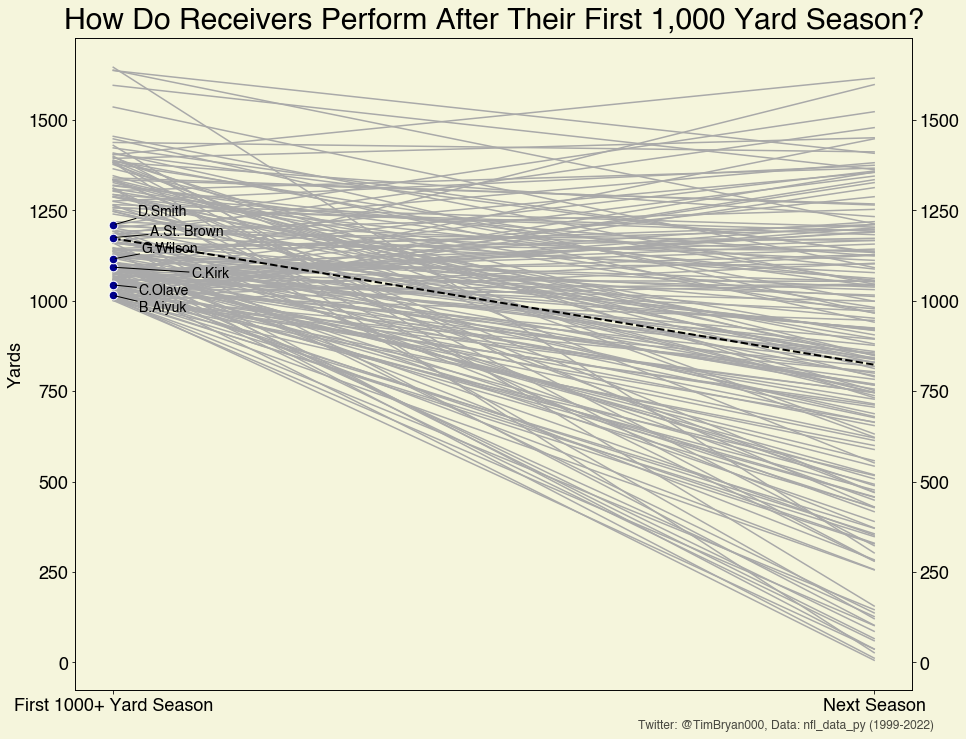

In [129]:
from adjustText import adjust_text

# Define custom font
font = {'family': 'Helvetica',
        'weight': 'bold',
        'size': 12}
mpl.rc('font', **font)

# Create a larger plot
fig, ax = plt.subplots(figsize=(15, 12))

# Set the background color to beige
fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')

# For each player, create a line from yards_gained to next_season_yards
for idx, row in df.iterrows():
    plt.plot(['First 1000+ Yard Season', 'Next Season'], [row['First 1000+ Yard Season'], row['Next Season']],
             color='darkgray')  # Removed 'marker' parameter

# Calculate and plot the means of 'First 1000+ Yard Season' and 'Next Season'
mean_first = df['First 1000+ Yard Season'].mean()
mean_next = df['Next Season'].mean()
plt.plot(['First 1000+ Yard Season', 'Next Season'],
         [mean_first, mean_next], "k--", linewidth=2)

# Setting the label names for x and y axis
ax.set_ylabel('Yards', fontsize=18)  # Increase font size for y-axis label

# Increase size of axis ticks
ax.tick_params(axis='both', which='major', labelsize=18)

# For 2022 players, just mark their yards_gained
# Increase the marker size with the 's' parameter, change the color to a more standout one,
# and add an edge color to make them more visible
scatter = plt.scatter(['First 1000+ Yard Season']*len(df_2022), df_2022['First 1000+ Yard Season'],
                      color='darkblue', edgecolor='white', s=75, zorder=3)  # Reduced size of scatter points

# Add labels to the points
texts = [plt.text(0, df_2022['First 1000+ Yard Season'].iloc[i], df_2022['receiver'].iloc[i],
                  ha='center', va='center', fontsize=14) for i in range(len(df_2022))]
adjust_text(texts, expand_points=(2, 2), force_points=0.2,
            arrowprops=dict(arrowstyle='-', color='black'))  # Adjusted text spacing

# Duplicate y-axis tick marks on the right side
ax2 = ax.twinx()
ax2.set_yticks(ax.get_yticks())
ax2.set_ylim(ax.get_ylim())

# Match the font size of the right y-axis to the left y-axis
ax2.tick_params(axis='y', which='major', labelsize=18)

plt.title("How Do Receivers Perform After Their First 1,000 Yard Season?",
          fontsize=30, loc='center', pad=10)

# Add watermark
plt.gcf().text(0.92, 0.08, 'Twitter: @TimBryan000, Data: nfl_data_py (1999-2022)', fontsize=12, color='black',
               ha='right', alpha=0.7)

# Save the plot as a high-quality image
plt.savefig('../images/1000ydseason.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [83]:
df_2022

,season,receiver,receiver_id,"First 1,000+ Yard Season",next_season_yards
10851,2022,A.St. Brown,00-0036963,1175.0,NaN
10857,2022,B.Aiyuk,00-0036261,1015.0,NaN
10895,2022,C.Kirk,00-0034775,1093.0,NaN
10905,2022,C.Olave,00-0037239,1044.0,NaN
10975,2022,D.Smith,00-0036912,1210.0,NaN
11013,2022,G.Wilson,00-0037740,1116.0,NaN


In [ ]:
#